# **Uber Data Analysis Project**
This data project includes 2 part

**Part 1**: Insights from City Supply and Demand Data

In this section, we use the data provided to answer questions to provide insights into customer needs and Uber's service capabilities.

Q1. Name the 72 hour period with the highest amount of zeroes?

Q2. Between the 1st and 5th of February, which dates has the most completed trips?

Q3. What hour of the day had the most completed trips on February 11? 

Q4. What hour of the day from the 15 day period in February had the last number of requests?

Q5. What is percentage of all the eyeballs that ocurred on Friday?

Q6. What is the weighted average of requests per driver for the 15 day data set? 

Q7. Driver's schedules area drafted in 4 hour shifts, and Uber wants to change this to 8 hour shifts. Calculate which shift has the highest requests for the 15 day data set.

Q8. When the number of unique drivers increases so does the number of eyeballs?

Q9. On which day of the ratio the highest for the number of completed trips to requests?

Q10. If you have 10 drivers to add ton one hour throughout the 15 data set, which hour would you add them to?

Q11. How many hours of data are in this data set?

Q12. Use the data to determine when the best end-of-day is for drivers?

Q13. Which was the busiest 4 hour period in the data?

**Part 2**: Partner Business Modeling

In this section, we use the provided data to answer the questions in the two cases to determine the business partner model.

*Scenario 1*: The 4th of July is coming up and the maximum fleet is needed. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

- Promotion 1: $100 bonus to each driver who is online for at least 5 hours, accepts more than 78% of requests, completes 15 trips and has a 4 or 5 rating at this time.

- Promotion 2: A $5 bonus per trip to each driver that completes at least 15 trips and has a rating at least 4.

Q1. How much will drivers be paid with Promotion 1?

Q2. How much will drivers be paid with Promotion 2?

Q3. How many drivers would qualify for a bonus under Promotion 1 but not under Promotion 2?

Q4. Uber wants to give out awards to its drivers. Award criteria: Complete more than 23 trips in an 8 hour shift with an 80% acceptance rate and a rating of 4 or 5. Please determine which drivers will be given awards?

*Scenario 2*: A taxi driver currently generates $300 per day in fares (before expenses), works five days a week, takes two weeks off, and has the following expenses:

- Gas is $100 per week
- Insurance is $400 per month
- Prius lease is $300 per week (Vehicle rent)

The driver doesn't pay gas and rent expenses on off weeks.

A driver wants to upgrade from X to Black driver. The driver needs to purchase a new vehicle. They want to upgrade to a 2015 Hyundai Sonata. Assuming Hyundai Sonata costs is $49500.

Q1. Calculate the net income for a driver in a year

Q2. How much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?



In [378]:
# import libs
import pandas as pd 
import numpy as np

# visualization libs
import matplotlib.pyplot as plt 
import seaborn as sns 

## **Part 1**: Insight from City Supply and Demand Data

In [379]:
p1_df = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Uber\Test1_CSV1.csv')
p1_df.head()

,Date,Time (Local),EYEBALLS,ZEROES,COMPLETED TRIPS,REQUESTS,UNIQUE DRIVERS
0,01-Feb-11,7,94,31,65,40,4
1,01-Feb-11,8,88,20,37,27,3
2,01-Feb-11,9,72,25,24,52,18
3,01-Feb-11,10,83,38,1,24,6
4,01-Feb-11,11,32,17,34,41,3


In [380]:
p1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   EYEBALLS         336 non-null    int64 
 3   ZEROES           336 non-null    int64 
 4   COMPLETED TRIPS  336 non-null    int64 
 5   REQUESTS         336 non-null    int64 
 6   UNIQUE DRIVERS   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [381]:
p1_df.describe()

,Time (Local),EYEBALLS,ZEROES,COMPLETED TRIPS,REQUESTS,UNIQUE DRIVERS
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,51.041667,18.785714,32.294643,36.392857,15.568452
std,6.93251,29.606243,11.414127,20.100184,21.474187,9.400290
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,23.000000,8.750000,14.750000,17.000000,7.000000
50%,11.50000,53.000000,19.000000,31.000000,38.000000,15.000000
75%,17.25000,76.000000,28.000000,49.000000,54.250000,23.250000
max,23.00000,101.000000,40.000000,69.000000,73.000000,31.000000


In [382]:
p1_df.shape

(336, 7)

In [383]:
# checking missing values
p1_df.isna().sum()

Date               0
Time (Local)       0
EYEBALLS           0
ZEROES             0
COMPLETED TRIPS    0
REQUESTS           0
UNIQUE DRIVERS     0
dtype: int64

In [384]:
# checking duplicated values
p1_df.duplicated().sum()

0

In [385]:
# Convert 'Date' column to datetime
from datetime import datetime
p1_df['Date'] = pd.to_datetime(p1_df['Date'], format='%d-%b-%y')

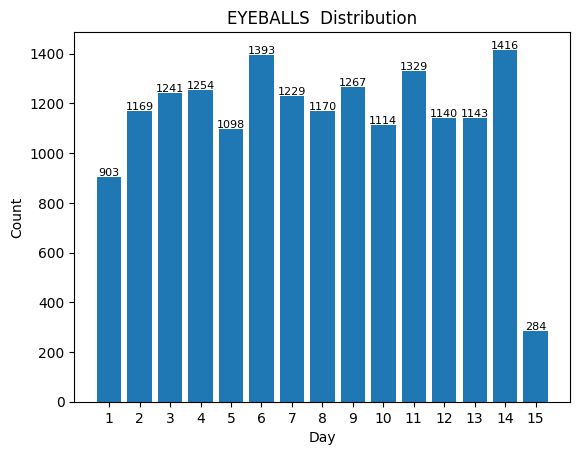

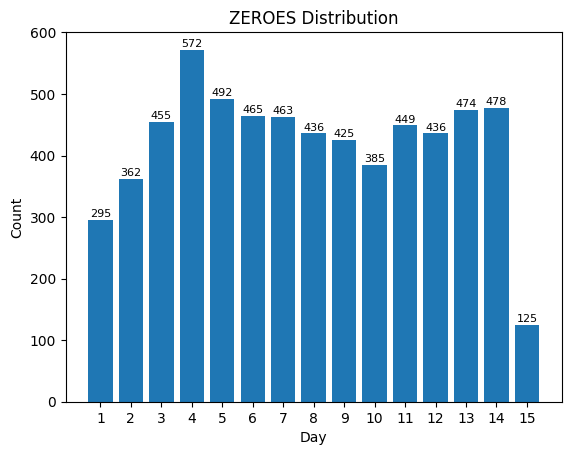

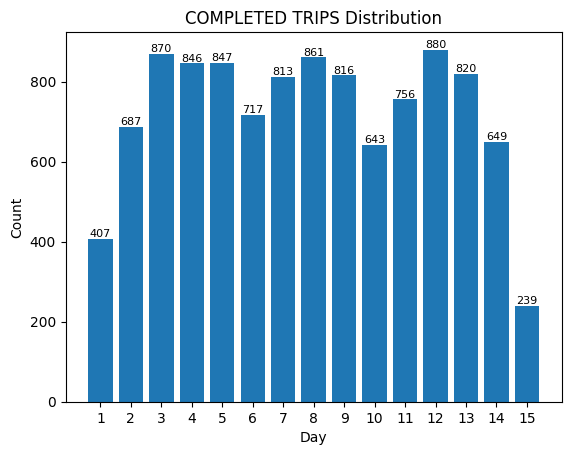

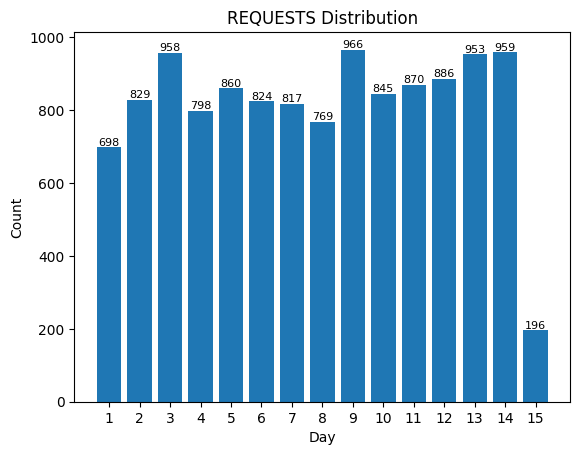

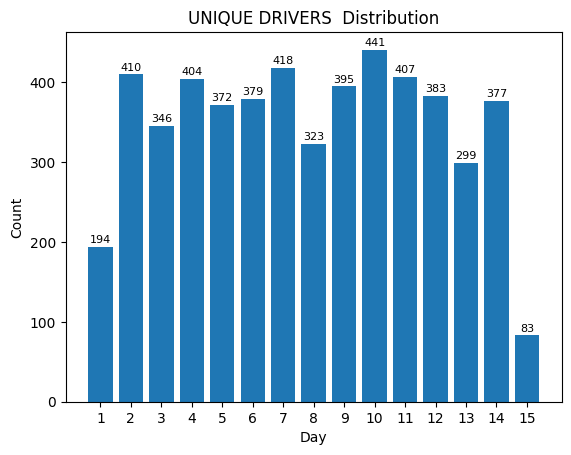

In [386]:
# Exploratory Data Analysis
cols = p1_df.columns.to_list()[2:]
a = p1_df.groupby('Date')[cols].sum().reset_index()
a['Day'] = a['Date'].dt.day
for col in cols:
    fig, ax = plt.subplots()
    bars = ax.bar(a['Day'], a[col])
    for bar in bars:
        yval = bar.get_height()
        ax.text(x=bar.get_x()+bar.get_width()/2.0, y=yval+5, s=int(yval), ha='center', fontsize=8)
    ax.set_xticks(range(1,len(a['Day'])+1)) #Add all values in x-axis
    ax.set_xlabel('Day')
    ax.set_ylabel('Count')
    ax.set_title(f'{col} Distribution')

Now that, we have loaded the dataset into a dataframe, we can start answering all questions in Part 1

Q1. Name the 72 hour period with the highest amount of zeroes?

In [387]:
# Answer Q1

# group p1_df by date and then calculate sum of zeros
zeros_by_date = p1_df.groupby('Date')['ZEROES'].sum().reset_index()

# calculate sum of zeros by 72 hour period
zeros_by_date['zeros_by_72hour'] = zeros_by_date['ZEROES'].rolling(window=3).sum()

# find the row that have a max value in zeros_by_72hour column
max_row = zeros_by_date.sort_values(by='zeros_by_72hour', ascending=False).head(n=1)
max_row

,Date,ZEROES,zeros_by_72hour
5,2011-02-06,465,1529.0


=> Ans Q1: The period from February 4 to 6 has the highest number of zeros.

Q2. Between the 1st and 5th of February, which dates has the most completed trips?

In [388]:
p1_df.columns

Index(['Date', 'Time (Local) ', 'EYEBALLS ', 'ZEROES', 'COMPLETED TRIPS',
       'REQUESTS', 'UNIQUE DRIVERS '],
      dtype='object')

In [389]:
# Answer Q2

# group p1_df by date and calculate sum of COMPLETED TRIPS
completedTrip_by_date = p1_df.groupby('Date')['COMPLETED TRIPS'].sum().reset_index().head(n=5)

# Date has the most completed trips
mostCompletedTrips = completedTrip_by_date.sort_values(by='COMPLETED TRIPS', ascending=False).head(n=1)
mostCompletedTrips

,Date,COMPLETED TRIPS
2,2011-02-03,870


=> Ans Q2: Between the 1st and 5th of February, February 3rd has the most completed trips

Q3. What hour of the day had the most completed trips on February 11?

In [390]:
# Answer Q3

# select rows of February 11
feb11 = p1_df.loc[p1_df['Date']=='2011-02-11', ['Time (Local) ', 'COMPLETED TRIPS']].reset_index(drop=True)

# find the hour of the day had the most COMPLETED TRIPS
hourOfDay = feb11.sort_values(by='COMPLETED TRIPS', ascending=False).head(n=1)
hourOfDay

,Time (Local),COMPLETED TRIPS
15,15,69


=> Ans Q3: On Feb 11, 15:00 had the most completed trips

Q4. What hour of the day from the 15 day period in February had the last number of requests?

In [391]:
# Answer Q4

# group p1_df by Time (Local) and calculate sum of requests
requestsByHour = p1_df.groupby('Time (Local) ')['REQUESTS'].sum().reset_index()

# find the hour of the day had the last number of requests
hourOfDay = requestsByHour.sort_values(by='REQUESTS', ascending=True).head(n=1)
hourOfDay

,Time (Local),REQUESTS
1,1,396


=> Ans Q4: From 01:00 to 02:00 from the 15 days period in February had the last number of requests

Q5. What is percentage of all the eyeballs that ocurred on Friday?

In [392]:
# Answer Q5

# find the day of the week corresponding to the date data in 'Date' column
p1_df['Weekday'] = p1_df['Date'].dt.day_name()

# find the sum of all 'EYEBALLS' that occurred on Weekday
sumEyeballsOnWeekday = p1_df.groupby('Weekday')['EYEBALLS '].sum().reset_index()

# find the percentage of all 'Eyeballs' that
totalEyeballs = sumEyeballsOnWeekday['EYEBALLS '].sum()
totalEyeballsByFriday = sumEyeballsOnWeekday.loc[sumEyeballsOnWeekday['Weekday']=='Friday', 'EYEBALLS '].values[0]
pct = round(totalEyeballsByFriday/totalEyeballs,2)*100
print(f'The percentage is {pct} %')

The percentage is 15.0 %


=> Ans Q5: The percentage of all the eyeballs that ocurred on Friday is 15%

Q6. What is the weighted average of requests per driver for the 15 day data set?

In [393]:
# Answer Q6

# Calculate weight by 'requests'
p1_df['weight'] = p1_df['REQUESTS'] / p1_df['REQUESTS'].sum()

#p1_df['Ratio_REQ_UniDri'] = p1_df.apply(lambda row: row['REQUESTS'] / row['UNIQUE DRIVERS '] if row['UNIQUE DRIVERS '] != 0 else 0, axis=1)

# grouping by Date to calculate weight average
avgByDate = p1_df.groupby(['Date'])[['REQUESTS','UNIQUE DRIVERS ', 'weight']].sum().reset_index()
avgByDate['ratio'] = avgByDate['REQUESTS'] / avgByDate['UNIQUE DRIVERS ']
ratio = round(avgByDate['weight'].multiply(avgByDate['ratio']).sum(),2)
print(f'The weighted average of requests per driver for the 15 day data set is {ratio}')

The weighted average of requests per driver for the 15 day data set is 2.41


=> Ans Q6: The weighted average ratio of requests per driver is 2.41

Q7. Driver's schedules area drafted in 4 hour shifts, and Uber wants to change this to 8 hour shifts. Calculate which shift has the highest requests for the 15 day data set.

In [394]:
# Answer Q7

# group p1_df by Time(Local) and calculate sum of requests
request_by_hour = p1_df.groupby('Time (Local) ')['REQUESTS'].sum().reset_index()

# seperate time to shifts
labels = ['Shift 1', 'Shift 2', 'Shift 3']
bins = [-1,7,15,23]
request_by_hour['Shift'] = pd.cut(request_by_hour['Time (Local) '], bins=bins, labels=labels)

# find the shift that has the highest requests
requests_by_shift = request_by_hour.groupby('Shift')['REQUESTS'].sum().reset_index().sort_values(by='REQUESTS', ascending=False).head(n=1)
requests_by_shift

,Shift,REQUESTS
1,Shift 2,4176


=> Ans Q7: Shift 2 from 8:00 to 15:00 has the highest requests for the 15 day data set.

Q8. When the number of unique drivers increases so does the number of eyeballs?

<Axes: >

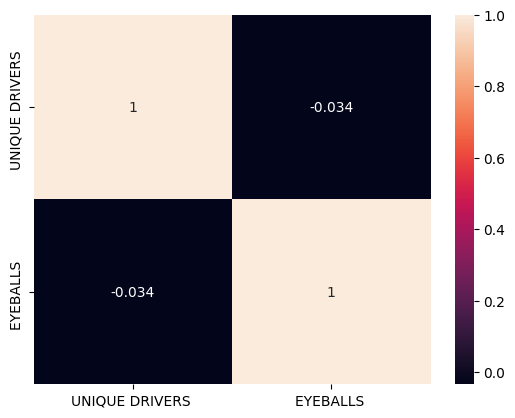

In [395]:
# Answer Q8

# Plot heatmap to determine relationship between 'unique drivers' and 'eyeballs'
subset_df = p1_df[['UNIQUE DRIVERS ', 'EYEBALLS ']]

# Calculate correlation between 'unique drivers' and 'eyeballs'
corr = subset_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

=> Ans Q8: There is no linear relationship between 'unique drivers' and 'eyeballs', so it's FALSE

Q9. On which day of the ratio the highest for the number of completed trips to requests?

In [396]:
# Answer Q9

# group p1_df by date and calculate ratio between completed trips to requests
comp_req_by_date = p1_df.groupby('Date')[['REQUESTS', 'COMPLETED TRIPS']].sum().reset_index()
comp_req_by_date['Ratio_comp_req'] = comp_req_by_date['COMPLETED TRIPS'] / comp_req_by_date['REQUESTS']
comp_req_by_date.sort_values(by='Ratio_comp_req', ascending=False).head(n=1)

,Date,REQUESTS,COMPLETED TRIPS,Ratio_comp_req
14,2011-02-15,196,239,1.219388


=> Ans Q9: February 15 has the highest ratio between completed trips and requests

Q10. If you have 10 drivers to add ton one hour throughout the 15 data set, which hour would you add them to?

In [397]:
# Answer Q10

# group p1_df by Time (Local) and calculate sum of unique drivers and eyeballs
uindriver_by_time = p1_df.groupby('Time (Local) ')[['EYEBALLS ','UNIQUE DRIVERS ']].sum().reset_index()
uindriver_by_time['eyeballs_per_unidriver'] = uindriver_by_time['EYEBALLS '] / uindriver_by_time['UNIQUE DRIVERS ']
uindriver_by_time.sort_values(by='eyeballs_per_unidriver', ascending=False).head(n=1)

,Time (Local),EYEBALLS,UNIQUE DRIVERS,eyeballs_per_unidriver
23,23,814,163,4.993865


=> Ans Q10: Due to 23:00 has the smallest ratio eyeballs per unique driver, additional drivers will be added during this period.

Q11. How many hours of data are in this data set?

In [398]:
# Answer Q11
numbers_hours = p1_df['Time (Local) '].count()
numbers_hours

336

=> Ans Q11: There are 336 hours of data in this dataset

Q12. Use the data to determine when the best end-of-day is for drivers.

One way to approach this question is to calculate the average number of completed trips and unique drivers for each hour of the day over the entire two-week period. We can then look for the hour with the lowest number of completed trips and unique drivers to find the time when supply and demand are at their natural minimums.

In [399]:
# Answer Q12

# group p1_df by time and calculate mean of completed trips and unique drivers
mean_compTrips_unidri_by_hour = p1_df.groupby('Time (Local) ')[['COMPLETED TRIPS', 'UNIQUE DRIVERS ']].mean().reset_index()
mean_compTrips_unidri_by_hour.sort_values(by=['COMPLETED TRIPS', 'UNIQUE DRIVERS '], ascending=True).head(n=1)

,Time (Local),COMPLETED TRIPS,UNIQUE DRIVERS
0,0,25.142857,17.0


=> Ans Q12: The best end-of-day for drivers is 0:00, which is when supply and demand are at their natural minimums and might make the most sence to consider as the 'end day'

Q13. Which was the busiest 4 hour period in the data?

In [400]:
# Answer Q13

# group p1_df by time (local) and calculate sum of completed trips
comptrips_by_hour = p1_df.groupby('Time (Local) ')['COMPLETED TRIPS'].sum().reset_index()
comptrips = comptrips_by_hour['COMPLETED TRIPS'].values
comptrips14 = comptrips[1:5].sum()
comptrips710 = comptrips[7:11].sum()
comptrips1215 = comptrips[12:16].sum()
comptrips1922 = comptrips[19:23].sum()
vals = [comptrips14, comptrips710, comptrips1215, comptrips1922]
maxval = max(vals)
maxindex = vals.index(maxval)
maxindex


2

=> Ans Q13: 12:00 to 15:00 is the busiest 4 hour period in the dataset.

## **Part 2**: Partner Business Modeling

In [401]:
p2_df = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Uber\Test1_CSV2.csv')

In [402]:
p2_df.head()

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING
0,UberDriver1,18,83,4,4
1,UberDriver2,23,95,4,1
2,UberDriver3,25,90,7,1
3,UberDriver4,16,75,9,2
4,UberDriver5,22,74,2,3


In [403]:
p2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              119 non-null    object
 1   TRIPS COMPLETED   119 non-null    int64 
 2   ACCEPT RATE (%)   119 non-null    int64 
 3   SUPPLY HOURS      119 non-null    int64 
 4   RATING            119 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.8+ KB


In [404]:
p2_df.describe()

,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING
count,119.000000,119.000000,119.000000,119.000000
mean,13.605042,86.310924,5.907563,2.848739
std,7.455198,9.180624,3.191598,1.381713
min,1.000000,70.000000,1.000000,1.000000
25%,7.000000,78.500000,3.000000,2.000000
50%,14.000000,88.000000,6.000000,3.000000
75%,20.000000,94.000000,8.500000,4.000000
max,25.000000,100.000000,11.000000,5.000000


In [405]:
p2_df.shape

(119, 5)

In [406]:
p2_df.columns

Index(['Name', 'TRIPS COMPLETED ', 'ACCEPT RATE (%)', 'SUPPLY HOURS',
       'RATING'],
      dtype='object')

Exploratory Data Analysis

In [407]:
# plot function
def plot_eda(df, col_group, col_agg):
    """ Group df by col_group then count number of values in col_agg
    """
    a = df.groupby(col_group)[col_agg].count().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    bars = ax.bar(a[col_group], a[col_agg])
    for bar in bars:
        yval = bar.get_height()
        ax.text(x=bar.get_x()+bar.get_width()/2.0, y=yval+0.05, s=int(yval), ha='center', fontsize=7.5)
    ax.set_xticks(a[col_group])
    ax.set_xlabel(f'{col_group}')
    ax.set_ylabel('Number of Drivers')
    ax.set_title(f'Driver Distribution Across {col_group}')

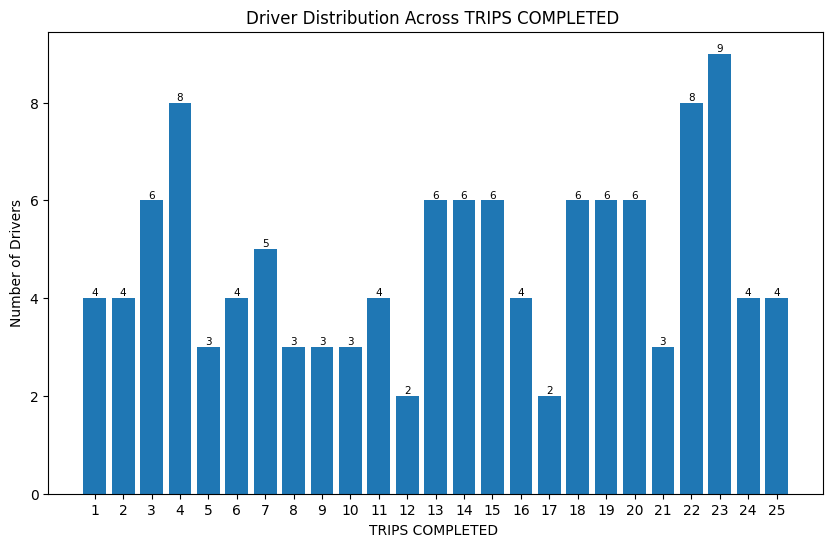

In [408]:
plot_eda(p2_df, 'TRIPS COMPLETED ', 'Name')

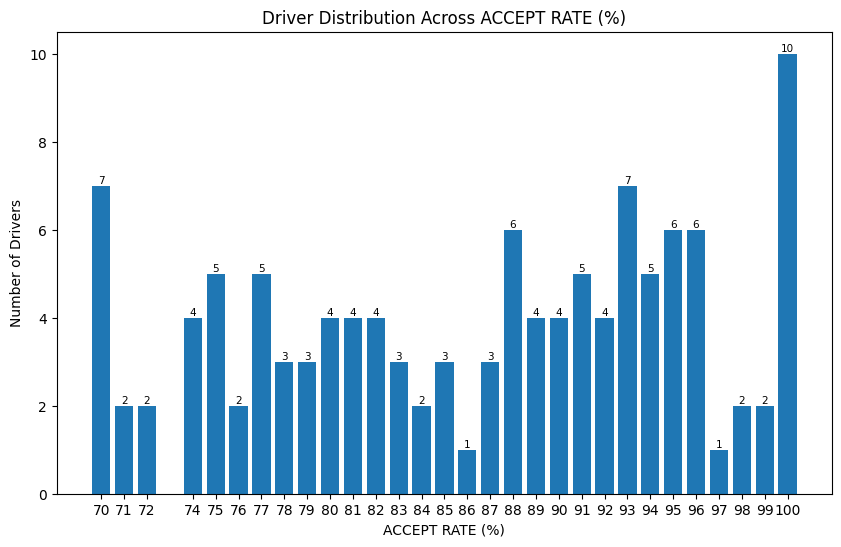

In [409]:
plot_eda(p2_df, 'ACCEPT RATE (%)', 'Name')

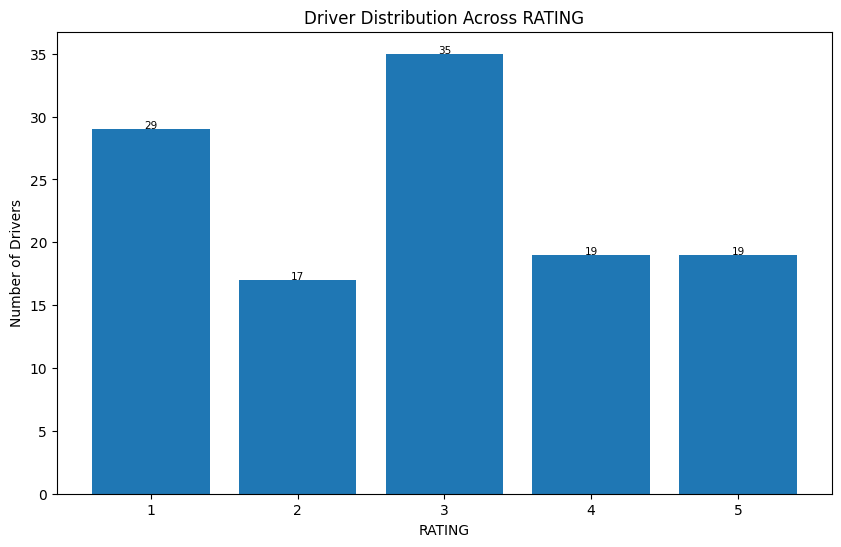

In [410]:
plot_eda(p2_df, 'RATING', 'Name')

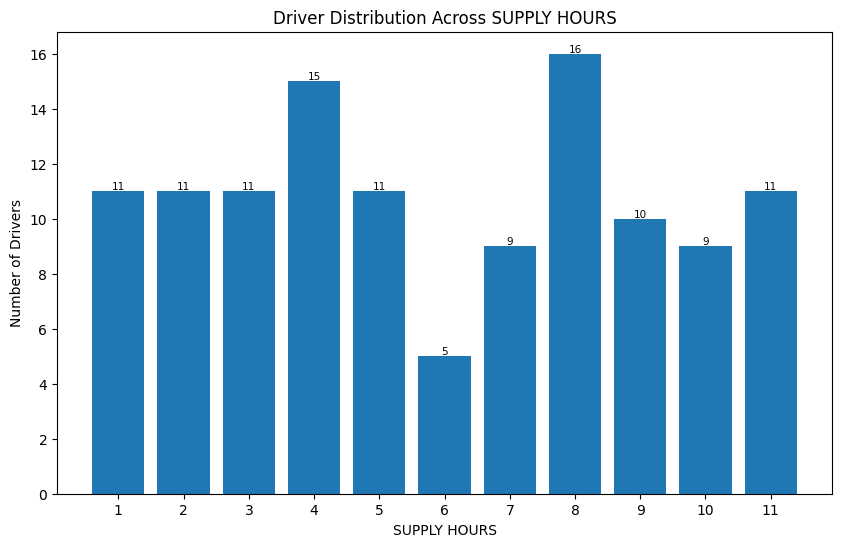

In [411]:
plot_eda(p2_df, 'SUPPLY HOURS', 'Name')

In [412]:
# checking missing values
p2_df.isna().sum()

Name                0
TRIPS COMPLETED     0
ACCEPT RATE (%)     0
SUPPLY HOURS        0
RATING              0
dtype: int64

In [413]:
# checking duplicated values
p2_df.duplicated().sum()

0

Now that, we have loaded the dataset into a dataframe, we can start answering all questions in Part 2

*Scenario 1*: The 4th of July is coming up and the maximum fleet is needed. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

- Promotion 1: $100 bonus to each driver who is online for at least 5 hours, accepts more than 78% of requests, completes 15 trips and has a 4 or 5 rating at this time.

- Promotion 2: A $5 bonus per trip to each driver that completes at least 15 trips and has a rating at least 4.

Q1. How much will drivers be paid with Promotion 1?

Q2. How much will drivers be paid with Promotion 2?

Q3. How many drivers would qualify for a bonus under Promotion 1 but not under Promotion 2?

Q4. Uber wants to give out awards to its drivers. Award criteria: Complete more than 23 trips in an 8 hour shift with an 80% acceptance rate and a rating of 4 or 5. Please determine which drivers will be given awards?


Before compute the amount of bonus for those qualified drivers, let's filter out drivers who meet the qualifications of each promotions

In [414]:
p2_df.columns

Index(['Name', 'TRIPS COMPLETED ', 'ACCEPT RATE (%)', 'SUPPLY HOURS',
       'RATING'],
      dtype='object')

In [415]:
# Answer Q1

# filter out drivers who meet the qualifications of promotion 1
promotion1 = p2_df[(p2_df['SUPPLY HOURS']>=5)&(p2_df['ACCEPT RATE (%)']>78)&(p2_df['TRIPS COMPLETED ']>=15)&(p2_df['RATING']>=4)]
promotion1

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING
21,UberDriver22,19,84,8,5
23,UberDriver24,23,91,8,5
48,UberDriver49,22,86,5,5
49,UberDriver50,15,81,6,4
65,UberDriver66,15,79,11,4
81,UberDriver82,15,100,7,4
82,UberDriver83,24,91,8,5
105,UberDriver106,23,90,9,4


In [416]:
# calculate bonus
bonus_promotion1 = len(promotion1)*100
print(f'The total bonus payout with promotion 1 would be ${bonus_promotion1}')

The total bonus payout with promotion 1 would be $800


=> Ans Q1: The total bonus payout with promotion 1 would be $800

In [417]:
# Answer Q2

# filter out drivers who meet the qualifications of promotion 2
promotion2 = p2_df[(p2_df['TRIPS COMPLETED ']>=15)&(p2_df['RATING']>=4)]
promotion2

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING
0,UberDriver1,18,83,4,4
14,UberDriver15,16,93,1,4
21,UberDriver22,19,84,8,5
23,UberDriver24,23,91,8,5
27,UberDriver28,18,87,3,5
42,UberDriver43,22,77,7,5
48,UberDriver49,22,86,5,5
49,UberDriver50,15,81,6,4
65,UberDriver66,15,79,11,4
66,UberDriver67,21,70,1,4


In [418]:
# calculate bonus
bonus_promotion2 = promotion2['TRIPS COMPLETED '].sum()*5
print(f'The total bonus payout with promotion 2 would be ${bonus_promotion2}')

The total bonus payout with promotion 2 would be $1500


=> Ans Q2: The total bonus payout with promotion 2 would be $1500

In [420]:
# Answer Q3

# use left join to screen values under promotion 1 and not under promotion 2
df1 = pd.merge(promotion1, promotion2, how='left', on=promotion1.columns.to_list(), indicator=True)
df1

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING,_merge
0,UberDriver22,19,84,8,5,both
1,UberDriver24,23,91,8,5,both
2,UberDriver49,22,86,5,5,both
3,UberDriver50,15,81,6,4,both
4,UberDriver66,15,79,11,4,both
5,UberDriver82,15,100,7,4,both
6,UberDriver83,24,91,8,5,both
7,UberDriver106,23,90,9,4,both


In [421]:
# included by only promotion 1
df1[df1['_merge']=='left_only']

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING,_merge


=> Ans Q3: There are 0 driver included in promotion 1 and not in promotion 2

In [423]:
# Answer Q4

# filter out the driver who meet adward criteria
adward = p2_df[(p2_df['TRIPS COMPLETED ']>23)&(p2_df['SUPPLY HOURS']==8)&(p2_df['ACCEPT RATE (%)']>=80)&(p2_df['RATING']>=4)]
adward

,Name,TRIPS COMPLETED,ACCEPT RATE (%),SUPPLY HOURS,RATING
82,UberDriver83,24,91,8,5


=> Ans Q4: Driver 83 is the driver that meet all adward criteria.

*Scenario 2*: A taxi driver currently generates $300 per day in fares (before expenses), works five days a week, takes two weeks off, and has the following expenses:

- Gas is $100 per week
- Insurance is $400 per month
- Prius lease is $300 per week (Vehicle rent)

The driver doesn't pay gas and rent expenses on off weeks.

A driver wants to upgrade from X to Black driver. The driver needs to purchase a new vehicle. They want to upgrade to a 2015 Hyundai Sonata. Assuming Hyundai Sonata costs is $49500.

Q1. Calculate the net income for a driver in a year

Q2. How much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?

In [424]:
# Answer Q1

# Revenue
months = 12
total_week_per_year = 52
working_days = 5
daily_fare = 300

# Expenses
gas_per_week = 100
insurance_per_month = 400
rent_per_week = 300

In [430]:
annual_gross_fares = daily_fare*(total_week_per_year-2)*working_days
print(f'The taxi driver makes ${annual_gross_fares}, in fares before expenses')
total_expenses = (gas_per_week+rent_per_week)*(total_week_per_year-2)+insurance_per_month*months
print(f'Total expenses for each driver per year would be ${total_expenses}')
net_income = annual_gross_fares - total_expenses
profit = net_income / annual_gross_fares
profit_margin = round(profit*100,2)
print(f'The net income for each taxi driver per year is ${net_income}, which consitutues a profit margin of {profit_margin}%')

The taxi driver makes $75000, in fares before expenses
Total expenses for each driver per year would be $24800
The net income for each taxi driver per year is $50200, which consitutues a profit margin of 66.93%


In [431]:
# Answer Q2

# total new expenses for each Black driver
new_car = 49500
total_new_expenses = new_car + gas_per_week*(total_week_per_year-2) + insurance_per_month*months
print(f'Total expenses should be ${total_new_expenses}')

Total expenses should be $59300


In [432]:
new_annual_gross_fare = net_income + total_new_expenses
new_daily_fare = new_annual_gross_fare / ((total_week_per_year-2)*working_days)
gross_fare_increase_per_day = new_daily_fare - daily_fare
gross_fare_increase_per_week = gross_fare_increase_per_day*5
print(f'Uber driver should raise weekly fares by ${gross_fare_increase_per_week}')

Uber driver should raise weekly fares by $690.0


=> Uber drivers need to earn an additional $690 per week in the first year to pay off their car payments in 1 year and maintain the same net income as before.